## <center> Exploratory data analysis with pandas in python, part 2 </center>
### <center> Andras Zsom, Lead Data Scientist at CCV </center>
#### <center>github.com/brown-ccv/dscov_data_science</center>
#### <center>https://ccv-research.jupyter.brown.edu/</center>

## <center> Overview of part 1 </center>
 - read in csv, excel, and sql data into a pandas data frame
 - filter rows in various ways
 - select columns
 - merge and append data frames

# <center> Learning objectives for today </center>
### By the end of this talk, you will be able to
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## Dataset of the day

Adult dataset, see [here](https://archive.ics.uci.edu/ml/datasets/Adult)

## Packages of the day

matplotlib and pandas

### <font color='LIGHTGRAY'>By the end of this talk, you will be able to</font>
   - **visualize one column (categorical or continuous data)**
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


##  Let's load the data first!

In [59]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/adult_data.csv')
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Column is categorical

In [60]:
print(df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


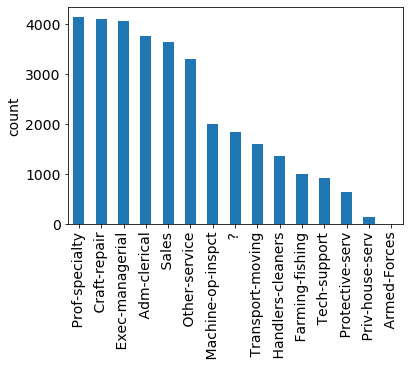

In [61]:
pd.value_counts(df['occupation']).plot.bar()
plt.ylabel('count')
plt.show()

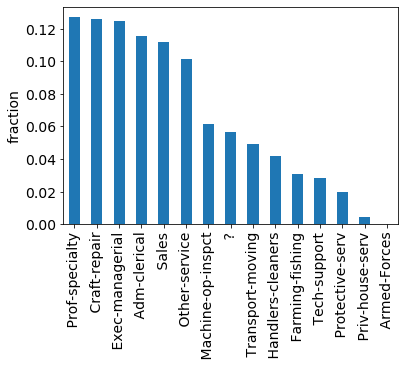

In [62]:
pd.value_counts(df['occupation'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.show()

### Column is continuous

In [63]:
print(df['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


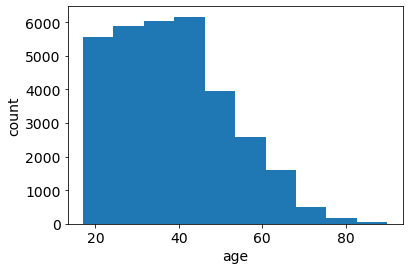

In [76]:
df['age'].plot.hist() # bins = int(np.sqrt(df['age'].count())) # bins = df['age'].nunique()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

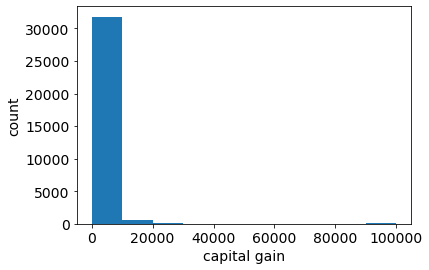

In [78]:
df['capital-gain'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogx()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

### <font color='LIGHTGRAY'>By the end of this talk, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - **visualize column pairs (all variations of continuous and categorical columns)**
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


### Continuous vs. continuous columns
- scatter plot

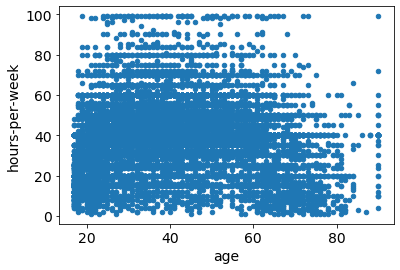

In [66]:
df.plot.scatter('age','hours-per-week')
plt.show()

### Continuous vs. continuous columns
- heatmap

In [67]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['age'], df['hours-per-week'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

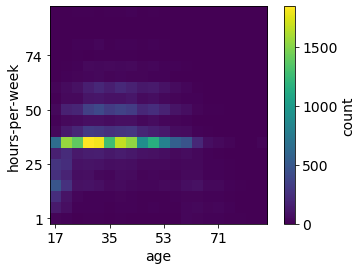

In [68]:
plt.imshow(heatmap.T, origin='lower') # use log count
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='count')
plt.show()

### Categorical vs. categorical columns
- stacked bar plot

In [69]:
count_matrix = df.groupby(['race', 'gross-income']).size().unstack()
print(count_matrix)

#count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

gross-income          <=50K   >50K
race                              
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     763    276
 Black                 2737    387
 Other                  246     25
 White                20699   7117


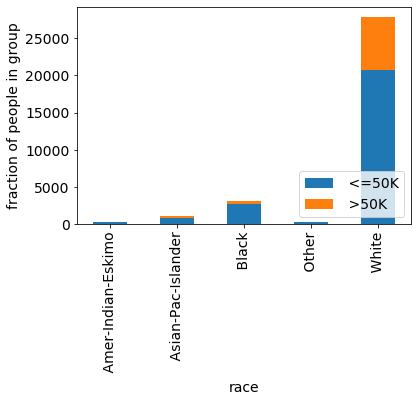

In [70]:
count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Continuous vs. categorical columns
- category-specific histograms

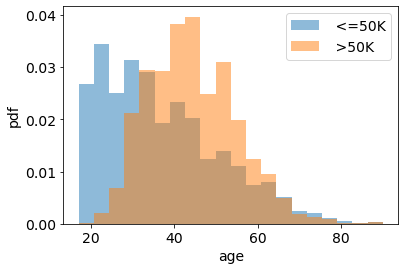

In [71]:
import matplotlib
from matplotlib import pylab as plt

categories = df['gross-income'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['gross-income']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('age')
plt.show()

### Continuous vs. categorical columns
- box plot

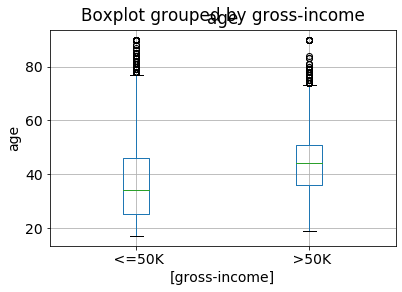

In [72]:
df[['age','gross-income']].boxplot(by='gross-income')
plt.ylabel('age')
plt.show()

### Continuous vs. categorical columns
- violin plot

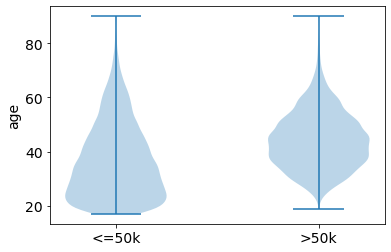

In [73]:
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

### <font color='LIGHTGRAY'>By the end of this talk, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - **visualize multiple columns simultaneously**

#### Scatter matrix

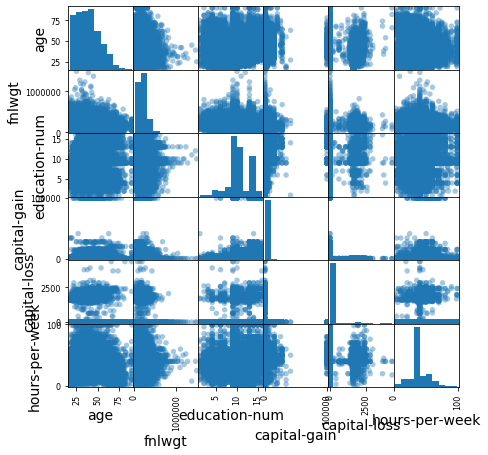

In [74]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(7, 7), marker='o',hist_kwds={'bins': 10}, 
                           s=30, alpha=.4)
plt.show()

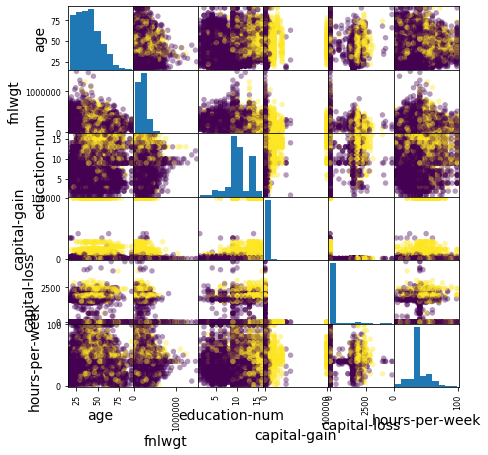

In [75]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(7, 7),c = pd.get_dummies(df['gross-income']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 10}, s=30, alpha=.4)
plt.show()

### By now, you can
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously